In [4]:
import pandas as pd
import os
import seaborn
from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import nltk
import string

The current problem statement is a classification problemm in which we have to classify the wether the text is fake or not.We have three significant figure for that which include title,aurthor and text.
</br>


In [2]:
os.listdir()

['submit.csv', 'test.csv', 'Untitled.ipynb', '.ipynb_checkpoints', 'train.csv']

In [5]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [4]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


Here is the distribution of the Fake and real News which the data is almost balance in this case with the 

In [6]:
train_df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

Now as per the graphs below there are some specific aurthors who contribute to  fake and real news.

<AxesSubplot:ylabel='author'>

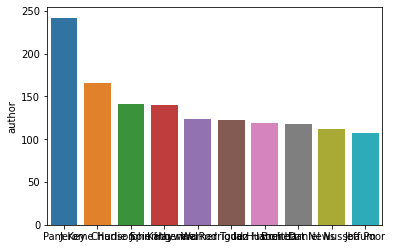

In [8]:

seaborn.barplot(x=train_df.loc[train_df['label']==0,'author'].value_counts()[0:10].index, y=train_df.loc[train_df['label']==0,'author'].value_counts()[0:10])


<AxesSubplot:ylabel='author'>

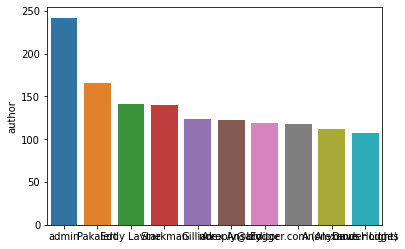

In [9]:
seaborn.barplot(x=train_df.loc[train_df['label']==1,'author'].value_counts()[0:10].index, y=train_df.loc[train_df['label']==0,'author'].value_counts()[0:10])


Now this the where we clean the text with stopword ,do lemmatization and at last we does cleaning of the text.<br/>
<h3>Discription of text cleaning</h3>
Remove Stopword <b>:</b> This function remove the stopword from the text.The stop word include is,in for etc.It's required because it remove<br>
       Lematization<b>:</b> This function provide Lematization feature in which we remove some try normalized text token so that two word with similary meaning can cosider same for modeling .<br>
       Clean Text<b>:</b> In the final text preparation we phase we did cleaning in which we remove the patuation and symobols which are irralavent for modelling.
  
 

In [ ]:

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()



In [20]:

train_df['title']=train_df['title'].astype(str)
train_df['title']=train_df['title'].apply(remove_Stopwords)
train_df['title']=train_df['title'].apply(lemmatize_text)
train_df['title']=train_df['title'].apply(clean_text)

<h3>Word Cloud</h3>
    
Below we have plotted two word for the fake and orginal new repectively on title which give the idea on which topic cause lot of fake news and how signigicant the title is intutionnely

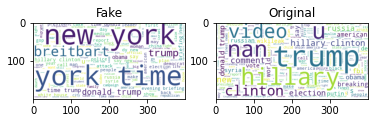

In [232]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2) 


wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
long_string = ','.join(list(train_df.loc[(train_df['label']==0),'title'].values))

wordcloud.generate(long_string)

axes[0].set_title("Fake")
axes[0].imshow(wordcloud)
#axes[0].annotate("First")


wordcloud1 = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
long_string1 = ','.join(list(train_df.loc[(train_df['label']==1),'title'].values))

wordcloud1.generate(long_string1)
# Visualize the word cloud

axes[1].set_title("Original")
axes[1].imshow(wordcloud1)


Here we have did train test split on the initial label data that was provided with 20% as test data from it.

In [6]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test=train_test_split(train_df.drop(columns="label"),train_df['label'],test_size=0.20, random_state=42)

As if know we know that all 3 feature play vital role for generation descion boundary will start from Ttitle field and considerd that individually for modeling.

We use TFidfVectorizer for converting that in vector the reaon why because the title text is small in compare to another columns and there Limited number word which caused the the fake review as we have obseve above in the WordCloud after many iteration

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer( max_df=0.7)


In [22]:
X_train.shape

(16640, 4)

In [24]:
X_train

,id,title,author,text
5933,5933,raccoon central park draw crowd warning stay a...,Sarah Maslin Nir,"Like a little crew of bandits, the first few..."
9646,9646,bolton susan rice scandal obama need asked kne...,John Hayward,"On Thursday’s Breitbart News Daily, SiriusXM h..."
8642,8642,hillary clinton charged obstruction justice co...,Iron Sheik,Home › POLITICS › IF HILLARY CLINTON IS CHARGE...
15126,15126,new york time ’ moscow bureau targeted hacker ...,Nicole Perlroth and David E. Sanger,The New York Times’s Moscow bureau was the tar...
3410,3410,gay sharia march branded ’ islamophobic ’ pick...,Donna Rachel Edmunds,An event organised by Gays Against Sharia to m...
...,...,...,...,...
11284,11284,trump supporter got nut msnbc reporter coverin...,EdJenner,Go to Article A Trump supporter wearing a Trum...
11964,11964,watch megyn kelly almost cry air trump took le...,Shepard Ambellas,Watch Megyn Kelly almost cry on air when Trump...
5390,5390,pay college le stress new york time,Ron Lieber,In this our quadrennial season of financial ho...
860,860,russian scientist track sea lion space,TASS,Russian scientists will track sea lions from s...


In [25]:
x=tfidf.fit_transform(X_train['title'])


We use Decision TreeClassifer for that because descion bounday is on the basis on individual work.We can try differt model to such as SVM,Logestic,ANN etc.

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
test_enc=tfidf.transform(X_test['title'])

In [30]:
rest=pac.predict(test_enc)

In [269]:
dcx=DecisionTreeClassifier()#max_iter=80)
dcx.fit(x,y_train)
rest1=dcx.predict(test_enc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), rest1)
print(cm)

[[1933  199]
 [ 152 1876]]


Below we assign each aurthor with probalsatic score and on the basic of the score modeling done

In [99]:
ovdf=pd.concat([X_train,y_train],axis=1)

In [100]:
ovdf['label'].value_counts()

1    8385
0    8255
Name: label, dtype: int64

In [114]:
dic_map_author={}
ovdf['author']=ovdf['author'].astype(str)
for i in ovdf['author'].unique():
    dic_map_author[i]=ovdf.loc[((ovdf['author']==i) & (ovdf['label']==0))].shape[0]/ovdf.loc[(ovdf['author']==i)].shape[0]

In [121]:

file_to_write = open("dic_aurthor_map.pickle", "wb")

pickle.dump(dic_map_author, file_to_write)


The Aurthor Map function is use to encode the aurthor name into probability form with preloaded dictonary if not there then assign zero by default

In [38]:
import pickle

In [72]:
def author_map(df):
    fil_pickl=open("dic_aurthor_map.pickle","rb")
#pickle.open  fil_pickl
    dic_author=pickle.load(fil_pickl)
    map_dic=df['author'].map(dic_author)
    dict_va=pd.DataFrame()
    dict_va['auth']=map_dic
    dict_va['auth']=dict_va['auth'].fillna(0)
    return dict_va


In [151]:
#y_train

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
bnb=GaussianNB()

In [63]:
aurth=author_map(X_train)

In [68]:
bnb.fit(aurth,y_train)

GaussianNB()

In [73]:
aurth=author_map(X_test)

In [75]:
rest=bnb.predict(aurth)

In [77]:

cm = confusion_matrix(list(y_test), rest)
print(cm)

[[1824  308]
 [   4 2024]]


In [86]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from keras.optimizers import Adam


This final feature which was considered for modeling because its a long sequence of text we have to use Sequence to Sequnce Learning modelings.In this case we had used LSTM.

In [110]:
#from transformers import BertConfig, BertModel,BertTokenizer
X_train['text']=X_train['text'].astype(str)
X_train['text']=X_train['text'].apply(remove_Stopwords)
X_train['text']=X_train['text'].apply(lemmatize_text)
X_train['text']=X_train['text'].apply(clean_text)

In [111]:
X_test['text']=X_test['text'].astype(str)
X_test['text']=X_test['text'].apply(remove_Stopwords)
X_test['text']=X_test['text'].apply(lemmatize_text)
X_test['text']=X_test['text'].apply(clean_text)

Here we tokenize and pad the text with text size

In [175]:
sentence_length = 25
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['text'])
df_train_total = tokenizer.texts_to_sequences(X_train['text'])
df_train_total = pad_sequences(df_train_total,maxlen = sentence_length)
df_test_total = tokenizer.texts_to_sequences(X_test['text'])
df_test_total = pad_sequences(df_test_total,maxlen = sentence_length)


In [119]:
print(len(df_train_total))
print(X_train.shape)

16640
(16640, 4)


In [223]:
model.reset_states()

Here we Use the model Embedding ,LSTM,Dense Layer to solve this problem the activation function which we had use is tanh in between the reason why because it can handle large sequence in  a go

In [224]:
opt = Adam(lr = 0.01)
embedding_vector_features=40
model = Sequential()
model.add(Embedding(1000000,embedding_vector_features,input_length=sentence_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=opt ,metrics=['accuracy'])
    


In [225]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 25, 40)            40000000  
_________________________________________________________________
dropout_63 (Dropout)         (None, 25, 40)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dropout_64 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                6464      
_________________________________________________________________
dropout_65 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)               

In [234]:
#del df_train_total
import gc
gc.collect()

744

In [228]:
model.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 25, 40)            40000000  
_________________________________________________________________
dropout_63 (Dropout)         (None, 25, 40)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dropout_64 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                6464      
_________________________________________________________________
dropout_65 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)               

In [229]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weight1.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

There is total 50 epochs that we had run for this problem

In [230]:
model.fit(df_train_total,y_train,epochs=50,batch_size=64,callbacks=[checkpoint])

Epoch 1/50
260/260 [==============================] - 96s 365ms/step - loss: 0.3673 - accuracy: 0.8212

Epoch 00001: loss improved from inf to 0.29489, saving model to model_weight1.hdf5
Epoch 2/50
260/260 [==============================] - 97s 375ms/step - loss: 0.0963 - accuracy: 0.9665

Epoch 00002: loss improved from 0.29489 to 0.10124, saving model to model_weight1.hdf5
Epoch 3/50
260/260 [==============================] - 101s 387ms/step - loss: 0.0391 - accuracy: 0.9881

Epoch 00003: loss improved from 0.10124 to 0.04186, saving model to model_weight1.hdf5
Epoch 4/50
260/260 [==============================] - 97s 373ms/step - loss: 0.0170 - accuracy: 0.9938

Epoch 00004: loss improved from 0.04186 to 0.02062, saving model to model_weight1.hdf5
Epoch 5/50
260/260 [==============================] - 97s 373ms/step - loss: 0.0134 - accuracy: 0.9962

Epoch 00005: loss improved from 0.02062 to 0.01734, saving model to model_weight1.hdf5
Epoch 6/50
260/260 [============================

In [ ]:
model.fit(df_train_total, y_train,
          batch_size=64,
          epochs=50,
          callbacks=[checkpoint])


In [215]:
model.save("text_model.h5")

In [243]:
def model_vote(dl_model,bnb,dcx,test_comp1,test_comp2,test_comp3):
    preds = [1 if x > 0.5 else 0 for x in dl_model.predict(test_comp1)]
    preds2 = bnb.predict(test_comp2)
    preds3=dcx.predict(test_comp3)
    return preds,preds2,preds3
    

In [245]:
aurth=author_map(X_test)

In [254]:
p1,p2,p3=model_vote(model,bnb,dcx,df_test_total,aurth,test_enc)

In [255]:
cm = confusion_matrix(list(y_test), p1)
print(cm)

[[1906  226]
 [ 285 1743]]


In [256]:
cm = confusion_matrix(list(y_test), p2)
print(cm)

[[1824  308]
 [   4 2024]]


In [253]:
p3

array([0, 0, 1, ..., 0, 1, 1])

In [257]:
cm = confusion_matrix(list(y_test), p3)
print(cm)


[[1936  196]
 [ 144 1884]]


Now we with help of all three model we train an Decision Tree Classifier on top of that to find the final result

In [258]:
rest_frame=pd.DataFrame()

In [262]:
rest_frame['DL_Text']=p1
rest_frame['Probabilistic_Aurthor']=p2
rest_frame['Descion Tree Title']=p3
rest_frame['Label']=list(y_test)

In [271]:
dct=DecisionTreeClassifier()#max_iter=80)
dct.fit(rest_frame.drop(columns="Label"),rest_frame['Label'])

DecisionTreeClassifier()

In [272]:
confusion_matrix(list(y_test), dct.predict(rest_frame.drop(columns="Label")))

array([[2099,   33],
       [  33, 1995]])

In [235]:
preds=model.predict(df_test_total)

Submit.csv File Preparation

In [273]:
test_df['title']=test_df['title'].astype(str)
test_df['title']=test_df['title'].apply(remove_Stopwords)
test_df['title']=test_df['title'].apply(lemmatize_text)
test_df['title']=test_df['title'].apply(clean_text)

In [300]:
test_enc_submit=tfidf.transform(test_df['title'])

In [301]:
#test_enc_submit

In [277]:
test_enc_submit_title=dcx.predict(test_enc_submit)

In [279]:
aurth_test_submit=author_map(test_df)

In [282]:
#aurth_test_submit
aurth_test_submit_res=bnb.predict(aurth_test_submit)

In [284]:
#aurth_test_submit_res

In [236]:
test_df['text']=test_df['text'].astype(str)
test_df['text']=test_df['text'].apply(remove_Stopwords)
test_df['text']=test_df['text'].apply(lemmatize_text)
test_df['text']=test_df['text'].apply(clean_text)


In [285]:
sentence_length = 25
df_test_total_test_val = tokenizer.texts_to_sequences(test_df['text'])
df_test_total_sub = pad_sequences(df_test_total_test_val,maxlen = sentence_length)


In [289]:
aurth_test_submit_res

array([0, 1, 1, ..., 0, 1, 1])

In [302]:
p1,p2,p3=model_vote(model,bnb,dcx,df_test_total_sub,aurth_test_submit,test_enc_submit)

In [295]:
len(p3)

4160

In [303]:
rest_frame2=pd.DataFrame()
rest_frame2['DL_Text']=p1
rest_frame2['Probabilistic_Aurthor']=p2
rest_frame2['Descion Tree Title']=p3
#rest_frame2['Label']=list(y_test)

In [307]:
final_result=dct.predict(rest_frame2)

In [312]:
#final_result

In [311]:
test_df['Predicted_Label']=final_result

In [314]:
submission=test_df[['id','Predicted_Label']]

In [315]:
submission.to_csv("Final_Submission.csv",index=False)

In [238]:

cm = confusion_matrix(list(y_test), preds)
print(cm)

[[1906  226]
 [ 285 1743]]
